## 1. Library Imports

In [1]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## 2. Read CSV (features_3_sec.csv)

In [2]:
df = pd.read_csv("./GTZEN/features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


## 3. About the Dataset

In [3]:
df.shape

(9990, 60)

In [4]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [5]:
df = df.drop(labels='filename', axis=1)

## 4. Understanding the Audio Files

In [6]:
audio_recor = "./GTZEN/genres_original/blues/blues.00009.wav"

data, sr = librosa.load(audio_recor)
# sr is sampling rate of y, here default for DVD output channel 45600 HZ
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [7]:
librosa.load(audio_recor, sr=45600)

(array([ 0.04592178,  0.06352827,  0.06494654, ..., -0.0435676 ,
        -0.03524505, -0.01756614], dtype=float32),
 45600)

In [8]:
Audio(data, rate=sr)

## 5. Visualizing Audio Files

### A. Raw Plotting Audio Files

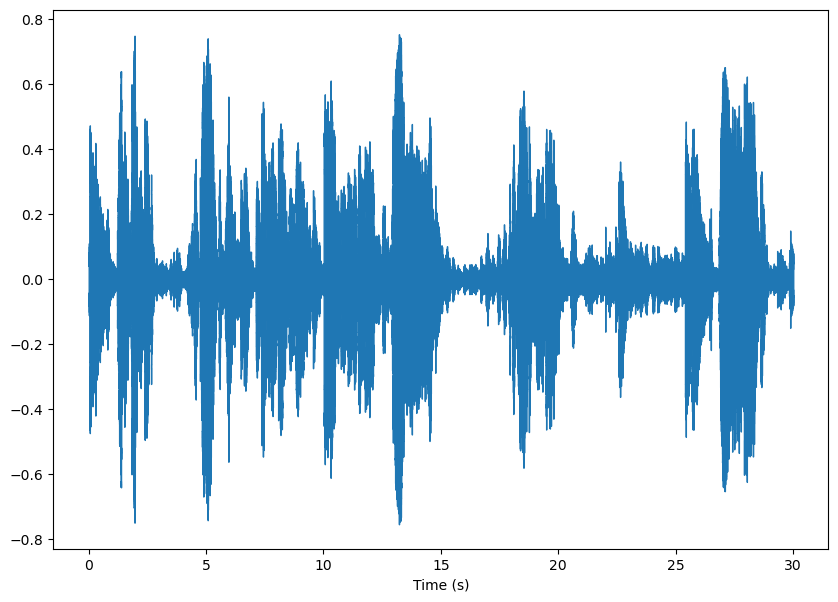

In [9]:
plt.figure(figsize=(10,7))
librosa.display.waveshow(data, sr=sr, x_axis="s", label="Amplitude Time plot of Audio file")

### B. Spectrograms
- representing signal loudness over time at various frequencies

C:\Users\Sumit\miniconda3\envs\tf-cuda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


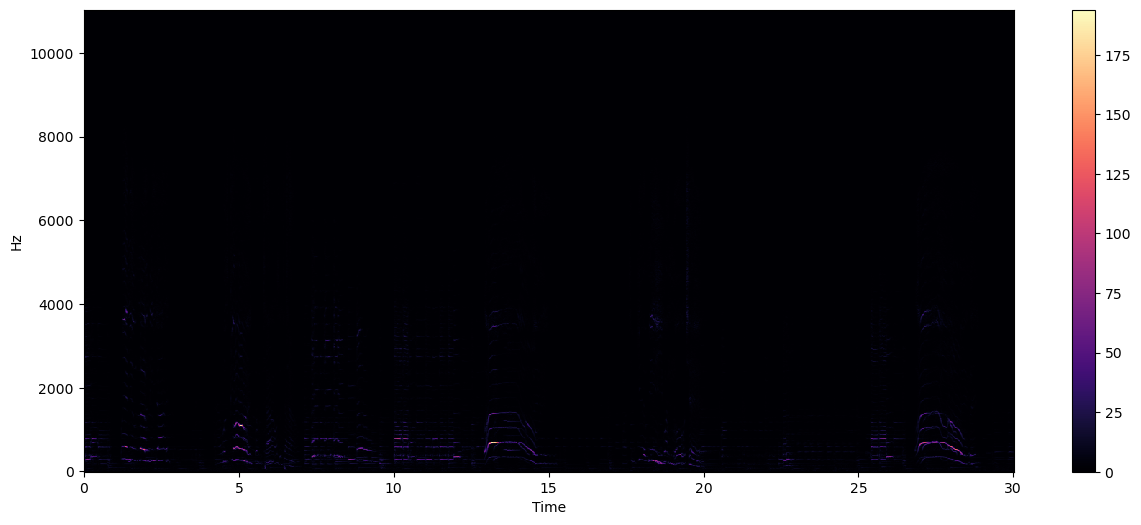

In [10]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(15,6))
librosa.display.specshow(stft, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()

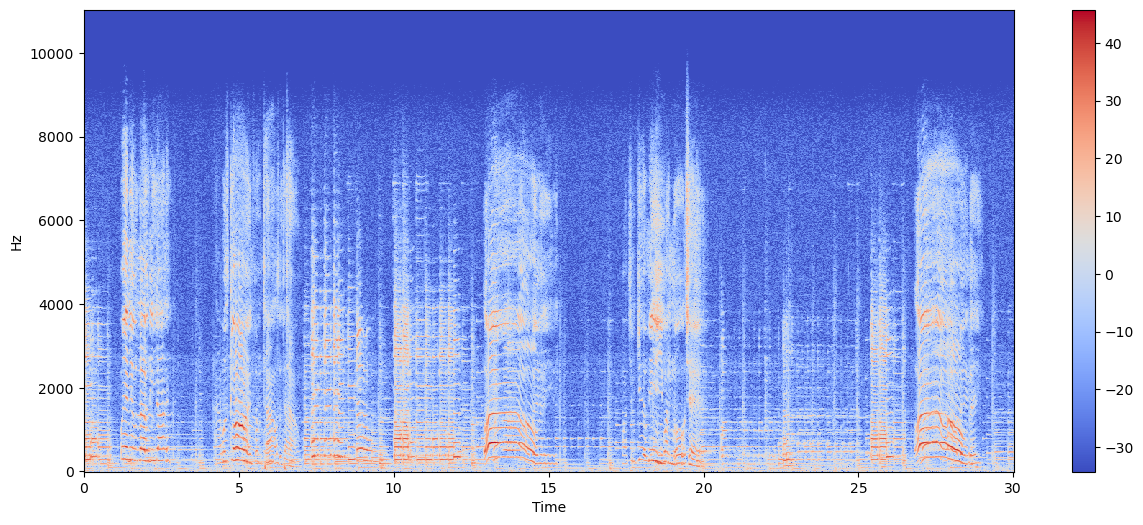

In [11]:
plt.figure(figsize=(15,6))
librosa.display.specshow(stft_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()

### C. Spectral Rolloff
- frequency below which a specified percentage of the total spectral energy lies

C:\Users\Sumit\AppData\Local\Temp\ipykernel_12064\477709931.py:2: FutureWarning: Pass y=[ 0.05647827  0.07399536  0.05327392 ... -0.03052734 -0.02955078
 -0.02741455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]


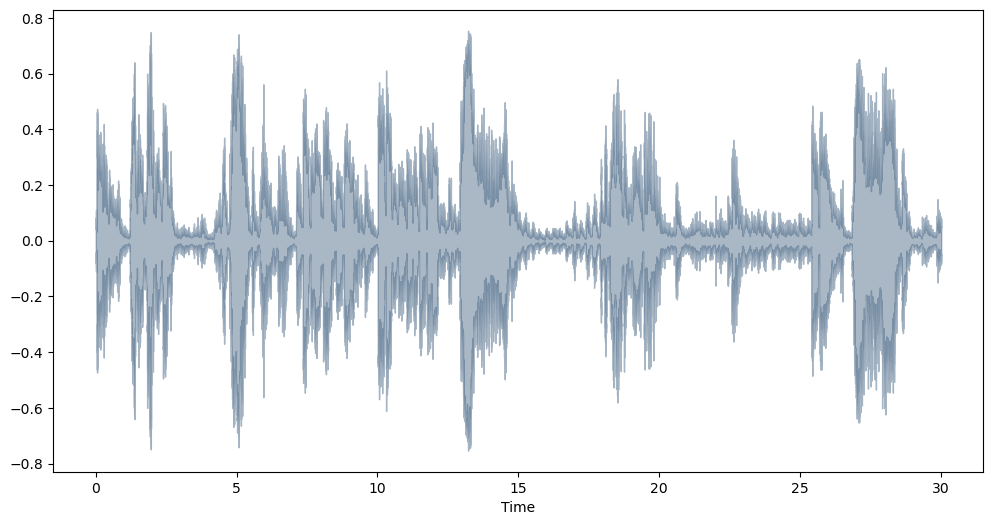

In [12]:
#from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12,6))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#2B4F72")

### D. Chroma Feature
- Pitch can be meaningfully categorized
- Captures Harmonic and melodic features

C:\Users\Sumit\AppData\Local\Temp\ipykernel_12064\1943221876.py:2: FutureWarning: Pass y=[ 0.04647827  0.06399536  0.04327393 ... -0.04052734 -0.03955078
 -0.03741455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


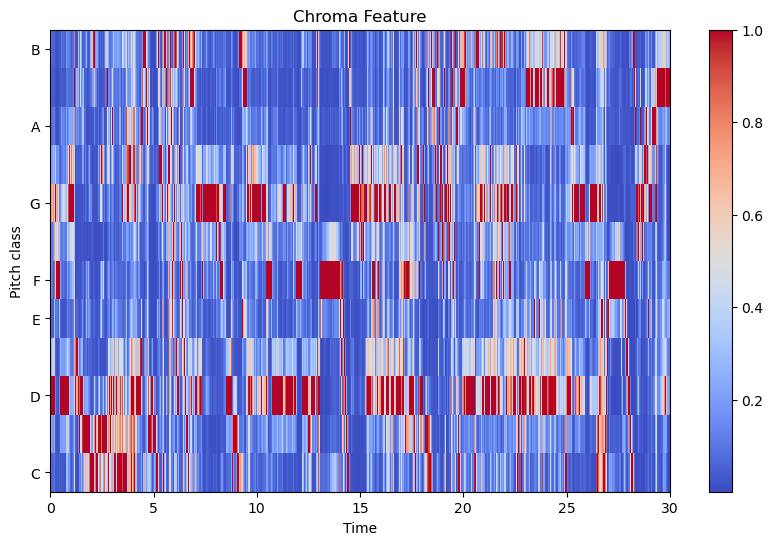

In [13]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(10,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis="chroma", cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Feature")
plt.show()

### E. Zero-Crossing Rate
- measure of the number of times in a given time that the amplitude of speech passes through a value of zero

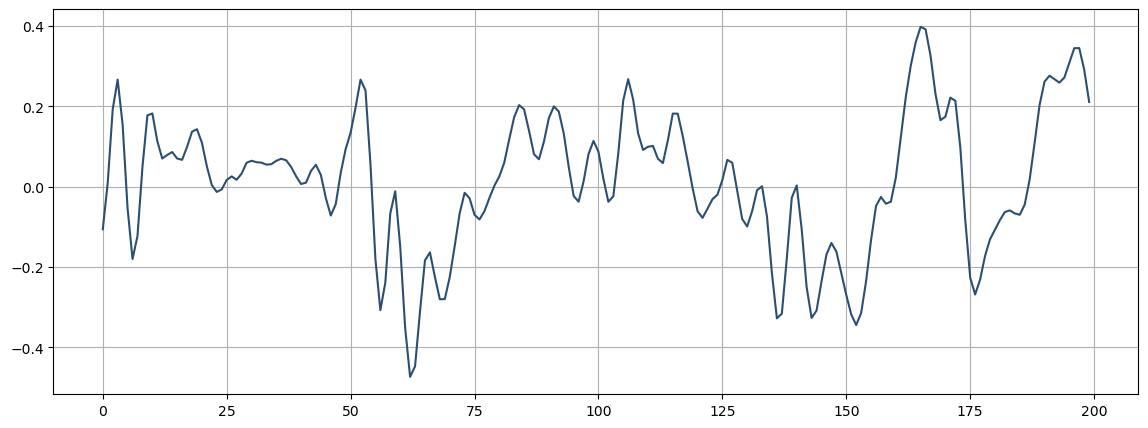

In [14]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color="#2B4F72")
plt.grid()

In [15]:
zero_crossing_rate = librosa.zero_crossings(data[start: end], pad=False)
print("Zero_Crossing_Rate : ", sum(zero_crossing_rate))

Zero_Crossing_Rate :  23


## 4. Feature Extraction

In [16]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [17]:
y = convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [18]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:,:-1], dtype = float))

In [19]:
X

array([[ 0.        , -0.48780784,  0.64052047, ..., -0.51356204,
         0.12841417, -0.29178072],
       [ 0.        , -0.40314187,  0.13183473, ...,  1.01138445,
         1.27578001,  0.05642464],
       [ 0.        , -0.36169428,  0.7644909 , ..., -0.04624405,
         0.65390663, -0.52145798],
       ...,
       [ 0.        , -0.35433044,  0.42997426, ..., -0.15370124,
         0.11765485, -0.33882395],
       [ 0.        ,  0.0883611 , -0.00630133, ..., -0.72456977,
         0.30333409, -0.95893743],
       [ 0.        , -0.11321002,  0.19536324, ..., -0.37245283,
        -0.47495901, -0.55112155]])

## 5. Preparing Training and Testing Data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)

In [21]:
X_train

array([[ 0.        ,  0.41176592, -0.65718007, ..., -0.54671071,
        -0.6347242 , -0.03764728],
       [ 0.        ,  1.4399722 , -2.13084275, ..., -0.6563247 ,
        -0.49387489, -0.61653068],
       [ 0.        ,  0.43165044,  0.3082314 , ...,  0.20962643,
         0.34258521, -0.19842802],
       ...,
       [ 0.        ,  0.64617943, -0.3103202 , ..., -0.55316821,
        -0.39275944, -0.1754762 ],
       [ 0.        ,  0.68447881,  1.00264159, ...,  0.69402156,
         0.22164662, -0.3104595 ],
       [ 0.        ,  0.33504558,  1.09263953, ..., -0.24008511,
         1.08854706, -0.1428042 ]])

In [22]:
Y_train[:5]

array([3, 6, 5, 9, 3])

## 6. Building Model
<span style="color:cyan">1. Linear Models</span></br>
<span style="color:blue"> 2. Tree Model</span></br>
<span style="color:violet"> 3. Ensemble Models</span></br>
<span style="color:red"> 4. SVM Models </span></br>

In [23]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC, SVC   

### 1. Linear Classifier Models

#### A. Logistic-Regression Model

In [24]:
LogisticModel = LogisticRegression(random_state=1, solver="newton-cg")

In [25]:
LogisticModel.fit(X_train, Y_train)

LogisticRegression(random_state=1, solver='newton-cg')

In [26]:
LogisticModel.score(X_test, Y_test)

0.7258113436457385

#### B. SGD-Classifier

In [27]:
SGDModel = SGDClassifier(random_state=31)

In [28]:
SGDModel.fit(X_train, Y_train)

SGDClassifier(random_state=31)

In [29]:
SGDModel.score(X_test, Y_test)

0.6551410373066424

### 2. Tree Based Models

#### A. Decision Tree Model

In [30]:
DecisionTreeModel = DecisionTreeClassifier(random_state=42 )

In [31]:
DecisionTreeModel.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
DecisionTreeModel.score(X_test, Y_test)

0.6235972095844707

### 3. Ensemble Based Models

#### A. RandomForest Model

In [33]:
RandomForestModel = RandomForestClassifier(random_state=1)

In [34]:
RandomForestModel.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [35]:
RandomForestModel.score(X_test, Y_test)

0.8535031847133758

#### D. Hist Gradient Boosting Classifier

In [36]:
HistGBClassifier = HistGradientBoostingClassifier(random_state=41)

In [37]:
HistGBClassifier.fit(X_train,Y_train)

HistGradientBoostingClassifier(random_state=41)

In [38]:
HistGBClassifier.score(X_test, Y_test)

0.908098271155596

#### E. Bagging Model

In [39]:
BGClassifier = BaggingClassifier(random_state=42)

In [40]:
BGClassifier.fit(X_train, Y_train)

BaggingClassifier(random_state=42)

In [41]:
BGClassifier.score(X_test, Y_test)

0.7746436154079466

### 4. SVM Models

In [42]:
SVCModel = SVC(random_state=12, max_iter=1000)

In [43]:
SVCModel.fit(X_train, Y_train)

C:\Users\Sumit\miniconda3\envs\tf-cuda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000, random_state=12)

In [44]:
SVCModel.score(X_test, Y_test)

0.8495602062481044

### 5. Neural Networks

In [45]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# creating a neural networks
model = Sequential()
model.add(Flatten(input_shape=(58,)))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 58)                0         
                                                                 
 dense (Dense)               (None, 256)               15104     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                        

In [46]:
adam = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=32)

Epoch 1/100
210/210 [==============================] - 4s 6ms/step - loss: 1.2955 - accuracy: 0.5663 - val_loss: 0.8738 - val_accuracy: 0.7279
Epoch 2/100
210/210 [==============================] - 1s 5ms/step - loss: 0.7744 - accuracy: 0.7284 - val_loss: 0.6352 - val_accuracy: 0.7825
Epoch 3/100
210/210 [==============================] - 1s 5ms/step - loss: 0.6156 - accuracy: 0.7929 - val_loss: 0.5648 - val_accuracy: 0.8168
Epoch 4/100
210/210 [==============================] - 1s 6ms/step - loss: 0.5213 - accuracy: 0.8185 - val_loss: 0.5045 - val_accuracy: 0.8301
Epoch 5/100
210/210 [==============================] - 1s 5ms/step - loss: 0.4470 - accuracy: 0.8503 - val_loss: 0.4578 - val_accuracy: 0.8392
Epoch 6/100
210/210 [==============================] - 1s 5ms/step - loss: 0.3956 - accuracy: 0.8666 - val_loss: 0.4400 - val_accuracy: 0.8556
Epoch 7/100
210/210 [==============================] - 1s 6ms/step - loss: 0.3449 - accuracy: 0.8809 - val_loss: 0.4208 - val_accuracy: 0.8608

In [47]:
test_error, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)
print(f"Testing Accuracy : {test_accuracy}")

104/104 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.9145
Testing Accuracy : 0.9144676923751831


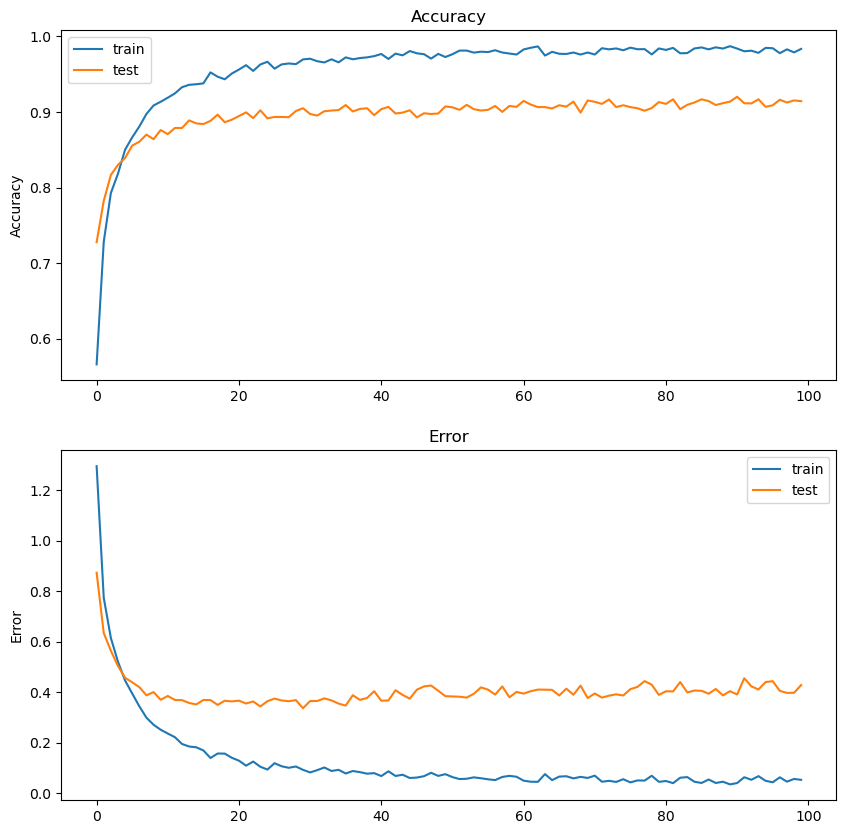

In [48]:
fig, axs = plt.subplots(2,figsize=(10,10))

# accuracy 
axs[0].plot(hist.history["accuracy"], label="train")
axs[0].plot(hist.history["val_accuracy"], label="test")    
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

# Error 
axs[1].plot(hist.history["loss"], label="train")
axs[1].plot(hist.history["val_loss"], label="test")    
axs[1].set_ylabel("Error")
axs[1].legend()
axs[1].set_title("Error")

plt.show()

### 6. CNN 2

In [49]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer, 
                loss="sparse_categorical_crossentropy",
                metrics="accuracy")
    return model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size)

In [50]:
def plotValidation(history):
    print("Validation Accuracy : {}".format(max(history.history["val_accuracy"])))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [51]:
modelCNN2 = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),

    Dense(256, activation='relu'),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])
print(modelCNN2.summary())
model_history = trainModel(model=modelCNN2, epochs=200, optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               30208     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [52]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print("Test Loss : ", test_loss)
print("\nBest Test Accuracy : ", test_accuracy)

26/26 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.9145
Test Loss :  0.42917120456695557

Best Test Accuracy :  0.9144676923751831
